# Detección de Fraude en Transacciones Bancarias

### Descripción del Proyecto
Este proyecto simula transacciones bancarias con datos de transacciones y detecta patrones de fraude.  
Se analizan transacciones sospechosas usando Python y Power BI.

## Objetivos: 🔍 
✔️ **Montos inusualmente altos**.  
✔️ **Métodos de pago sospechosos (Ej: Criptomonedas en grandes cantidades)**.  
✔️ **Usuarios con transacciones en distintos países en un tiempo corto**.  

## Visualización en Power BI? 📊
1️⃣ **Mapa de transacciones** 📍: Ubicaciones de las transacciones por usuario.  
2️⃣ **Gráfico de tiempo** ⏳: Identifica usuarios con actividad en lugares distantes en minutos.  
3️⃣ **Lista de usuarios sospechosos** ⚠️: Quiénes tienen más actividad fraudulenta.  

## Archivos del Proyecto 📂
- `transacciones_fraudulentas.csv` → Dataset con transacciones.  
- `fraude_bancario.ipynb` → Notebook con código.  
- `fraude_bancario.pbix` → Reporte en Power BI *(Próximamente)*.  

In [7]:
#librairies
from faker import Faker
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Initialize Faker
fake = Faker()

num_transactions = 10_000  # Number of transactions to generate
num_users = 500  # Number of unique users

# Fraud probability (5% fraud)
fraud_probability = 0.05

# Dictionary of locations with coordinates (latitude, longitude)
locations = {
    "Chile": (-33.4489, -70.6693),
    "Argentina": (-34.6037, -58.3816),
    "Colombia": (4.6100, -74.0833),
    "Peru": (-12.0464, -77.0428),
    "Mexico": (19.4326, -99.1332),
    "Cuba": (23.1136, -82.3666),
    "USA": (40.7128, -74.0060),
    "Brazil": (-23.5505, -46.6333),
    "Spain": (40.4168, -3.7038),
}

# Payment methods and their probabilities in normal transactions
payment_methods = ['Credit Card', 'Debit', 'Bank Transfer', 'Cryptocurrency']
payment_probabilities = [0.4, 0.3, 0.25, 0.05]  # Adjusted probabilities

# Fraudulent payment method probabilities
fraud_payment_probabilities = [0.25, 0.25, 0.1, 0.4]  # More fraud in cryptocurrency

# Generate a list of users that will be reused across multiple transactions
users = [fake.uuid4() for _ in range(num_users)]

data = []  # List to store transaction data

for _ in range(num_transactions):
    user_id = random.choice(users)  # Select a random user
    
    # Choose a random location
    country, (lat, lon) = random.choice(list(locations.items()))
    
    # Introduce slight variations in the location to simulate real data
    lat += np.random.uniform(-0.5, 0.5)
    lon += np.random.uniform(-0.5, 0.5)
    
    # Determine if the transaction is fraudulent
    is_fraud = np.random.choice([0, 1], p=[1 - fraud_probability, fraud_probability])  

    # Assign payment method based on probability
    if is_fraud == 1:
        amount = round(np.random.uniform(5000, 20_000), 2)  # Higher fraudulent amounts
        payment_method = np.random.choice(payment_methods, p=fraud_payment_probabilities)  # Fraud-prone methods
    else:
        amount = round(np.random.uniform(10, 5000), 2)  # Normal amount
        payment_method = np.random.choice(payment_methods, p=payment_probabilities)  # Normal methods

    # Append transaction to the list
    data.append([
        fake.uuid4(),  # Unique transaction ID
        user_id,  # User ID (repeated in multiple transactions)
        fake.date_time_this_year(),  # Date and time
        lat,  # Latitude
        lon,  # Longitude
        amount,  # Transaction amount
        payment_method,  # Payment method
        is_fraud,  # 1 = Fraud, 0 = Normal
        country  # Country name
    ])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Transaction_ID', 'User_ID', 'Date', 'Latitude', 'Longitude', 'Amount', 'Payment_Method', 'Fraud', 'Location'])

# Save as CSV for Power BI
df.to_csv('fraudulent_transactions.csv', index=False)

print("✅ Dataset generated and saved as 'fraudulent_transactions.csv'")

df.head()

✅ Dataset generated and saved as 'fraudulent_transactions.csv'


,Transaction_ID,User_ID,Date,Latitude,Longitude,Amount,Payment_Method,Fraud,Location
0,05b45702-63b3-4030-a5b3-6e07f2091f04,2cb84277-2b24-4245-88df-ac7b1fe6e4a8,2025-03-29 03:16:25,4.320634,-74.198557,4876.92,Debit,0,Colombia
1,e6392c36-9d2e-4cc8-97bf-929320a65d81,d90d63a3-556f-439e-8efb-0ca81460eb73,2025-01-07 02:22:00,40.548240,-4.061744,4436.20,Credit Card,0,Spain
2,4214b7fc-1e11-4ca5-afd8-0723459d2d3d,765352d6-f169-494f-882b-5863efefd376,2025-03-20 11:28:48,-23.325679,-46.284200,595.99,Cryptocurrency,0,Brazil
3,976a6ded-a933-40e1-a602-5707480c7c01,607a5852-0e7d-446f-90c5-2ee898e050f8,2025-03-05 00:27:13,40.859665,-73.873269,105.87,Credit Card,0,USA
4,621028f0-e657-49fc-833f-f12fc8b36153,084983cd-82d1-4a55-86de-e981050c01ee,2025-01-19 03:02:47,-32.965838,-70.631105,3552.32,Bank Transfer,0,Chile


In [9]:
#count number of rows equal to 1 in Fraud column
fraud_count = df['Fraud'].value_counts().get(1, 0)
print(f"Number of fraudulent transactions: {fraud_count}")  

Number of fraudulent transactions: 529


In [10]:
df.describe()

,Date,Latitude,Longitude,Amount,Fraud
count,10000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2025-02-17 22:24:17.609700096,3.000813,-65.297220,3045.607405,0.052900
min,2025-01-01 00:24:37,-35.102887,-99.633016,10.590000,0.000000
25%,2025-01-24 19:34:24,-23.823859,-77.322109,1316.200000,0.000000
50%,2025-02-17 20:58:47,4.669778,-73.785634,2646.870000,0.000000
75%,2025-03-13 21:42:42,23.410515,-58.149604,3976.562500,0.000000
max,2025-04-06 16:43:09,41.211535,-3.203907,19982.150000,1.000000
std,NaN,28.397940,25.618125,2848.191054,0.223845


c:\Users\ivana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


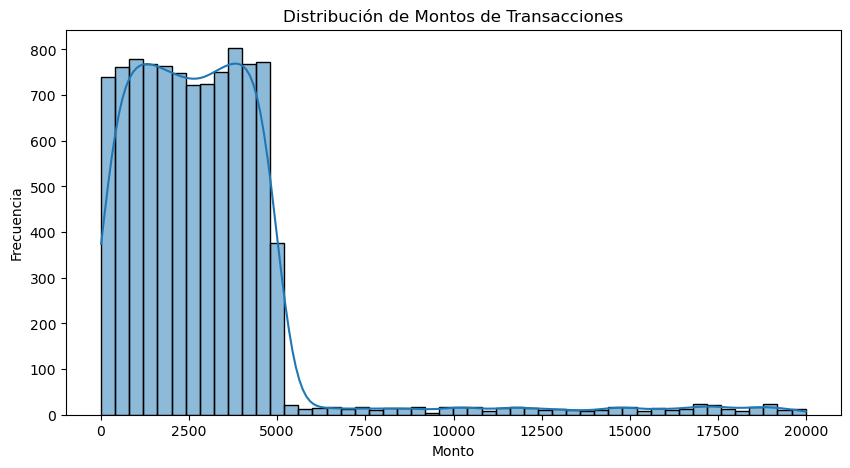

In [11]:
# Distribución de montos
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribución de Montos de Transacciones')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

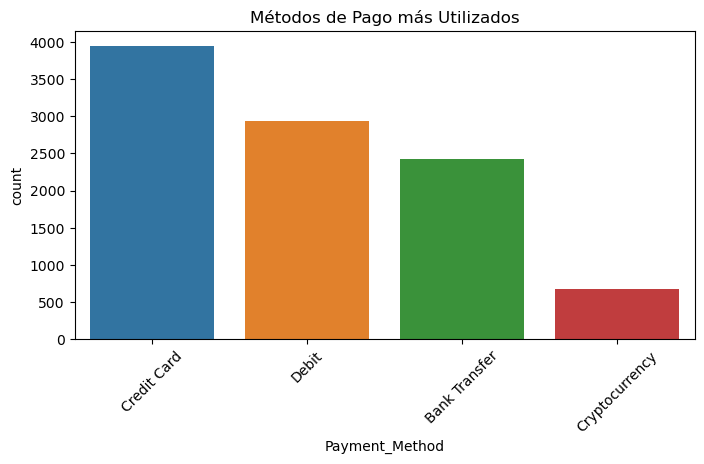

In [12]:
# Métodos de pago más utilizados
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Payment_Method', order=df['Payment_Method'].value_counts().index)
plt.title('Métodos de Pago más Utilizados')
plt.xticks(rotation=45)

plt.show()